### **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Here's a step-by-step guide to performing EDA using the libraries you've imported:

Objective : If the combination of the 'word' column and the 'coordination' column appears more than once, it is likely that they have the same document layout.

In [ ]:
# Importing libraries for numerical computing, data manipulation, math functions, statistical visualization, and statistical calculations
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

### 1. Loading Data

In [11]:
# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
excel_file_path = 'C:/Users/User/Documents/Clustering/05_Excel_Output_Sample/JSONoutput_table.xlsx'

# Reading the Excel file
df = pd.read_excel(excel_file_path)

df.head()

,File Name & Page,Word,X0,Y0,X1,Y1,X,Y,Coordinate
0,A1_page1,Asset,164,10,194,21,179,15,"(179, 15)"
1,A1_page1,Integrity,197,10,241,21,219,15,"(219, 15)"
2,A1_page1,Management,243,10,311,21,277,15,"(277, 15)"
3,A1_page1,Department,314,10,375,21,344,15,"(344, 15)"
4,A1_page1,AIM,240,36,260,47,250,41,"(250, 41)"


In [12]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   File Name & Page  2167 non-null   object
 1   Word              2166 non-null   object
 2   X0                2167 non-null   int64 
 3   Y0                2167 non-null   int64 
 4   X1                2167 non-null   int64 
 5   Y1                2167 non-null   int64 
 6   X                 2167 non-null   int64 
 7   Y                 2167 non-null   int64 
 8   Coordinate        2167 non-null   object
dtypes: int64(6), object(3)
memory usage: 152.5+ KB


In [13]:
# Generate descriptive statistics
df.describe()

,X0,Y0,X1,Y1,X,Y
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,213.580526,355.063683,241.470697,363.693124,227.485464,359.366867
std,145.048070,258.491159,146.135952,258.322832,145.331130,258.413756
min,3.000000,4.000000,10.000000,11.000000,6.000000,8.000000
25%,86.000000,90.000000,117.500000,99.000000,100.500000,94.000000
50%,189.000000,357.000000,225.000000,366.000000,203.000000,361.000000
75%,327.000000,605.000000,364.000000,614.000000,344.000000,609.000000
max,496.000000,769.000000,533.000000,777.000000,506.000000,772.000000


### EDA-1

First EDA test: Analyzing the column 'word' only.

Check unique values because unique values need to be removed. Why? We need the same value from different forms

In [14]:
# Display unique values in the 'Word' column
df['Word'].unique()

array(['Asset', 'Integrity', 'Management', 'Department', 'AIM', 'Form',
       '1', 'Inspection', 'Summary', 'Report', 'Part', 'A:', 'Details',
       '(to', 'be', 'filled', 'by', 'inspector)', 'Equipment', 'Tag:',
       '24PL710018-1101X-ET50', 'No.:', '2017-08-CUI-24PL710018-1101X-',
       'ET50-VI', 'Description:', 'Piping', 'DOSH', 'Registration',
       'Purpose', 'of', 'Inspection:', 'CUI', 'Types', 'Inspections:',
       'Tick', 'where', 'applicable', 'x', 'External', 'Others',
       '(specify):', 'Internal', 'UTTM', 'Inspector', 'remarks:',
       'Prepared', 'by:', 'Faded', 'paint', 'and', 'general', 'corrosion',
       'were', 'observed', 'on', 'RV', 'flanges.', '(Inspector)', 'with',
       'metal', 'flake', 'was', '71MOV2016', 'drain', 'nozzle.', 'Name',
       '&', 'stamp:', 'Date:', 'B:', 'Required', 'Rectification', 'Work',
       'Area', 'Engineer)', 'Photo', 'RA', 'criticality', 'as', 'per',
       'No.', '(RA)', 'PSM-MI-30531', 'Critical', '(Age', 'related)',
     

In [15]:
# Count the number of unique values in the 'Word' column
df['Word'].nunique()

399

In [16]:
# Calculate word counts
df['Word'].value_counts() #mode

Inspection              59
related)                48
Critical                48
No.:                    35
Photo                   29
                        ..
Remaining                1
Life                     1
(yr)                     1
Mohammad                 1
4-FF650384-1801Z-NI.     1
Name: Word, Length: 399, dtype: int64

In [32]:
# Calculate word counts
word_count = df['Word'].value_counts().reset_index()
word_count.columns = ['Word', 'Count']  # Renaming columns

# Count how many words have each count
count_frequency = word_count['Count'].value_counts().reset_index()
count_frequency.columns = ['Count', 'Frequency']

In [33]:
# Display the new DataFrame
print(count_frequency)

    Count  Frequency
0       1        163
1       6         49
2       2         43
3      12         27
4       4         24
5       3         17
6       5         11
7       8          8
8      18          8
9      13          7
10      7          6
11     10          5
12     14          4
13     24          3
14     23          3
15     11          3
16     20          2
17     48          2
18     22          2
19     26          2
20      9          2
21     59          1
22     17          1
23     19          1
24     25          1
25     27          1
26     29          1
27     35          1
28     15          1


In [40]:
count_frequency['Frequency'].describe()

count     29.000000
mean      13.758621
std       31.255463
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      163.000000
Name: Frequency, dtype: float64

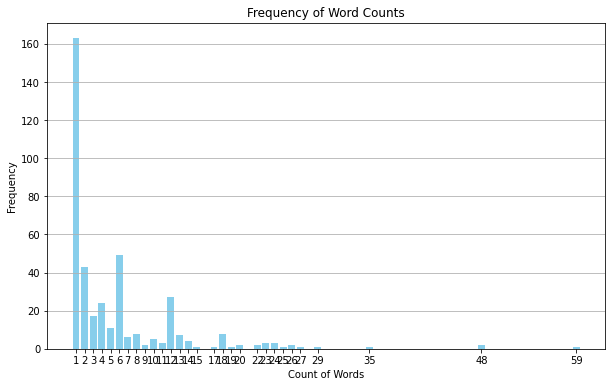

In [37]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(count_frequency['Count'], count_frequency['Frequency'], color='skyblue')
plt.xlabel('Count of Words')
plt.ylabel('Frequency')
plt.title('Frequency of Word Counts')
plt.xticks(count_frequency['Count'])
plt.grid(axis='y')

# Display the plot
plt.show()

In [38]:

# Calculate quartiles and IQR
Q1 = count_frequency['Frequency'].quantile(0.25)
Q3 = count_frequency['Frequency'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = count_frequency[(count_frequency['Frequency'] < lower_bound) | (count_frequency['Frequency'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers)


Outliers based on IQR:
   Count  Frequency
0      1        163
1      6         49
2      2         43
3     12         27
4      4         24


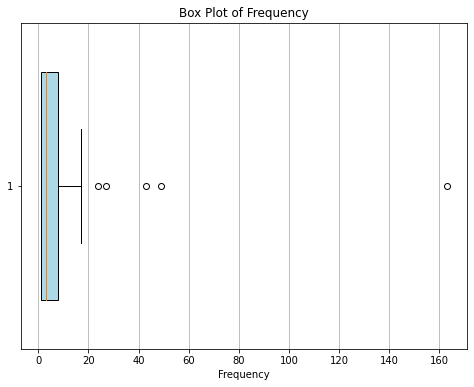

In [39]:
# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(count_frequency['Frequency'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Frequency')
plt.title('Box Plot of Frequency')
plt.grid(axis='x')

# Display the plot
plt.show()

**Summary** : Identified five outliers, but it doesn't make sense as 12 is also considered an outlier.

### EDA-2

Second EDA test: Analyzing the combined column 'word' and 'coordinate'

In [41]:
# Combine columns 'word', 'Coordinat' into a new column 'Combined'
df['Combined'] = df.apply(lambda row: f"{row['Word']} , {row['Coordinate']} ", axis=1)

In [42]:
df.head()

,File Name & Page,Word,X0,Y0,X1,Y1,X,Y,Coordinate,Combined
0,A1_page1,Asset,164,10,194,21,179,15,"(179, 15)","Asset , (179, 15)"
1,A1_page1,Integrity,197,10,241,21,219,15,"(219, 15)","Integrity , (219, 15)"
2,A1_page1,Management,243,10,311,21,277,15,"(277, 15)","Management , (277, 15)"
3,A1_page1,Department,314,10,375,21,344,15,"(344, 15)","Department , (344, 15)"
4,A1_page1,AIM,240,36,260,47,250,41,"(250, 41)","AIM , (250, 41)"


In [43]:
df['Combined'].unique()

array(['Asset , (179, 15) ', 'Integrity , (219, 15) ',
       'Management , (277, 15) ', 'Department , (344, 15) ',
       'AIM , (250, 41) ', 'Form , (277, 41) ', '1 , (296, 41) ',
       'Inspection , (224, 54) ', 'Summary , (279, 54) ',
       'Report , (325, 54) ', 'Part , (15, 73) ', 'A: , (31, 73) ',
       'Inspection , (61, 73) ', 'Details , (101, 73) ',
       '(to , (124, 73) ', 'be , (137, 73) ', 'filled , (156, 73) ',
       'by , (174, 73) ', 'inspector) , (203, 73) ',
       'Equipment , (26, 94) ', 'Tag: , (62, 94) ',
       '24PL710018-1101X-ET50 , (183, 94) ', 'Report , (288, 94) ',
       'No.: , (313, 94) ', '2017-08-CUI-24PL710018-1101X- , (460, 92) ',
       'ET50-VI , (414, 99) ', 'Equipment , (26, 121) ',
       'Description: , (78, 121) ', 'Piping , (143, 121) ',
       'DOSH , (286, 121) ', 'Registration , (328, 121) ',
       'No.: , (365, 121) ', 'Purpose , (21, 147) ', 'of , (46, 147) ',
       'Inspection: , (77, 147) ', 'CUI , (141, 148) ',
       'Inspect

In [44]:
df['Combined'].nunique()

881

In [45]:
df['Combined'].value_counts() #mode

Internal , (29, 772)          13
DATE: , (446, 47)             12
NO: , (40, 47)                12
x , (295, 68)                 12
Inspection , (238, 70)        12
                              ..
satisfactory , (133, 275)      1
condition. , (172, 275)        1
2. , (6, 285)                  1
Piping , (32, 285)             1
bolting. , (306, 759)          1
Name: Combined, Length: 881, dtype: int64

In [47]:
# Calculate word counts
word_count1 = df['Combined'].value_counts().reset_index()
word_count1.columns = ['Combined', 'Count1']  # Renaming columns

# Count how many words have each count
count_frequency1 = word_count1['Count1'].value_counts().reset_index()
count_frequency1.columns = ['Count1', 'Frequency1']

In [48]:
# Display the new DataFrame
print(count_frequency1)

   Count1  Frequency1
0       1         509
1       6         136
2       2          90
3       4          57
4       3          55
5       5          20
6      12          13
7      13           1


In [51]:
count_frequency1['Frequency1'].describe()

count      8.000000
mean     110.125000
std      167.118809
min        1.000000
25%       18.250000
50%       56.000000
75%      101.500000
max      509.000000
Name: Frequency1, dtype: float64

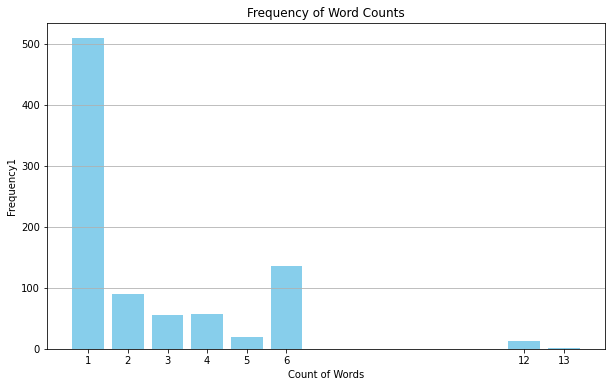

In [53]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(count_frequency1['Count1'], count_frequency1['Frequency1'], color='skyblue')
plt.xlabel('Count of Words')
plt.ylabel('Frequency1')
plt.title('Frequency of Word Counts')
plt.xticks(count_frequency1['Count1'])
plt.grid(axis='y')

# Display the plot
plt.show()

In [54]:
# Calculate quartiles and IQR
Q1 = count_frequency1['Frequency1'].quantile(0.25)
Q3 = count_frequency1['Frequency1'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = count_frequency1[(count_frequency1['Frequency1'] < lower_bound) | (count_frequency1['Frequency1'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers)

Outliers based on IQR:
   Count1  Frequency1
0       1         509


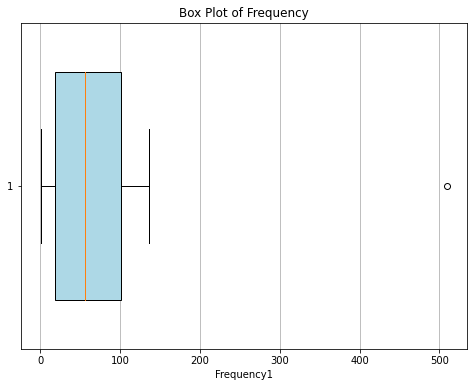

In [55]:
# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(count_frequency1['Frequency1'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Frequency1')
plt.title('Box Plot of Frequency')
plt.grid(axis='x')

# Display the plot
plt.show()

**Summary** : 1 outlier identified where 'word' and 'coordinate' have a count of 1 only. It shows this data is unique and needs to be removed.

### EDA-3

Third EDA test: Analyzing the combined column that have remove the outliers.

In [68]:
# Filter out rows where Count is 1
word_count_filtered = word_count1[word_count1['Count1'] > 1]

print(word_count_filtered)

                     Combined  Count1
0       Internal , (29, 772)       13
1          DATE: , (446, 47)       12
2             NO: , (40, 47)       12
3              x , (295, 68)       12
4     Inspection , (238, 70)       12
..                        ...     ...
367  Inspection , (172, 148)        2
368            x , (36, 240)        2
369        PRBI , (141, 148)        2
370            x , (36, 186)        2
371      Piping , (143, 121)        2

[372 rows x 2 columns]


In [69]:
# Check unique values in the 'Word' column 
word_count_filtered['Combined'].unique()

array(['Internal , (29, 772) ', 'DATE: , (446, 47) ', 'NO: , (40, 47) ',
       'x , (295, 68) ', 'Inspection , (238, 70) ',
       'After-Cleaning , (191, 70) ', 'External , (357, 67) ',
       'REPORT , (17, 47) ', 'Others: , (323, 70) ', 'EQPT. , (165, 47) ',
       'TAG: , (187, 47) ', 'PMT/PMD/PMA: , (327, 47) ',
       'Pre-Cleaning , (62, 70) ', 'Inspection , (106, 70) ',
       '1 , (18, 434) ', 'related) , (480, 419) ', '(Age , (456, 419) ',
       'Critical , (433, 419) ', 'PSM-MI-30531 , (466, 402) ',
       'No. , (46, 402) ', '(RA) , (292, 397) ', '(Non-age , (464, 434) ',
       'Critical , (433, 434) ', 'Work , (269, 397) ',
       'Non-critical , (441, 449) ', '& , (210, 638) ',
       'No.: , (85, 381) ', 'Photo , (65, 381) ',
       'Inspection , (392, 67) ', 'NI-VI , (59, 51) ',
       '2018 , (499, 46) ', 'Inspection) , (277, 638) ',
       'TP , (244, 638) ', 'Area , (226, 638) ', 'Engineer , (185, 638) ',
       'Rectification , (228, 397) ', 'Area , (154, 638) ',

In [70]:
word_count_filtered['Combined'].nunique()

372

In [71]:
# Count how many words have each count
count_frequency2 = word_count_filtered['Count1'].value_counts().reset_index()
count_frequency2.columns = ['Count1', 'Frequency1']

In [72]:
# Display the new DataFrame
print(count_frequency2)

   Count1  Frequency1
0       6         136
1       2          90
2       4          57
3       3          55
4       5          20
5      12          13
6      13           1


In [74]:
count_frequency2['Frequency1'].describe()

count      7.000000
mean      53.142857
std       47.733387
min        1.000000
25%       16.500000
50%       55.000000
75%       73.500000
max      136.000000
Name: Frequency1, dtype: float64

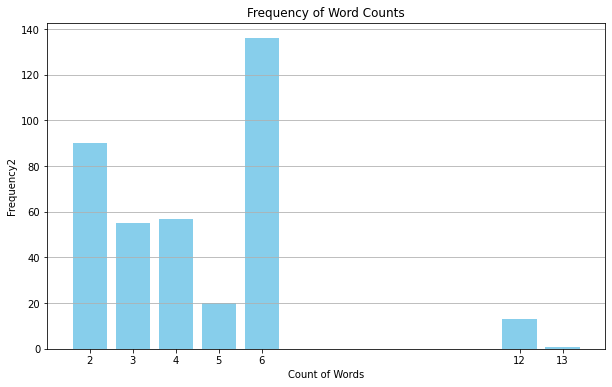

In [75]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(count_frequency2['Count1'], count_frequency2['Frequency1'], color='skyblue')
plt.xlabel('Count of Words')
plt.ylabel('Frequency2')
plt.title('Frequency of Word Counts')
plt.xticks(count_frequency2['Count1'])
plt.grid(axis='y')

# Display the plot
plt.show()

In [76]:
# Calculate quartiles and IQR
Q1 = count_frequency2['Frequency1'].quantile(0.25)
Q3 = count_frequency2['Frequency1'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = count_frequency2[(count_frequency2['Frequency1'] < lower_bound) | (count_frequency2['Frequency1'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers)

Outliers based on IQR:
Empty DataFrame
Columns: [Count1, Frequency1]
Index: []


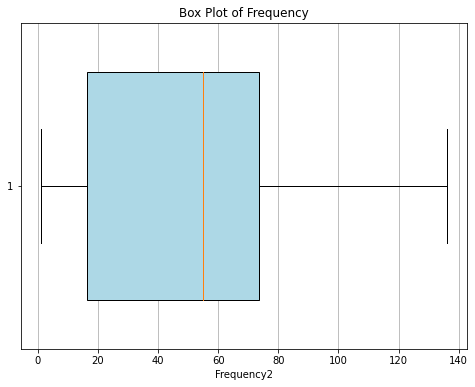

In [78]:
# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(count_frequency2['Frequency1'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Frequency2')
plt.title('Box Plot of Frequency')
plt.grid(axis='x')

# Display the plot
plt.show()

**Summary** : Need to check the outliers to identified row need to remove